# Costumer Segmentation using RFM analysis
###### This project is was done with the help of you tube (The AI univerity)

In [1]:
## import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data.csv',encoding = 'unicode_escape')

# 1 CLEANING DATA

<AxesSubplot:>

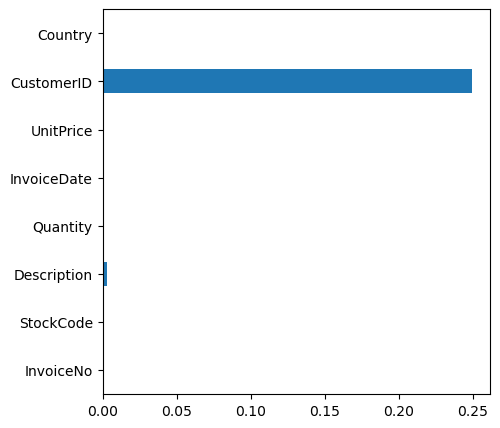

In [3]:
## checking for null values
plt.figure(figsize = (5,5))
df.isnull().mean(axis = 0).plot.barh()

### THERE ARE NULL VALUES IN COSTUMERID AND DESCRIPTION COLUMN 
#### we can dig deep and find if the missing values if possible 

In [4]:
df1 = df[df.CustomerID.isnull()]


In [5]:
 df2 = pd.DataFrame(df1.InvoiceNo.unique())


In [6]:
df2

,0
0,536414
1,536544
2,536545
3,536546
4,536547
...,...
3705,581435
3706,581439
3707,581492
3708,581497


In [7]:
df3 = df[df.CustomerID.notnull()]

In [8]:
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
df3[df3.InvoiceNo.isin(df2)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### since there is no way to repalce missing values we will have to drop them

In [10]:
df4 = df.dropna(subset = 'CustomerID')

<AxesSubplot:>

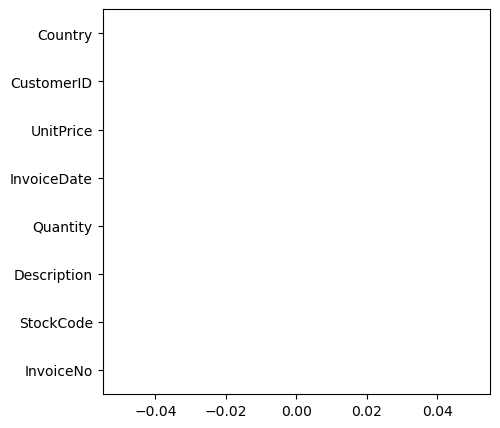

In [11]:
plt.figure(figsize = (5,5))
df4.isnull().mean(axis = 0).plot.barh()

### All the null values are removed
### NOW WE CAN REMOVE DUPLICATE VALUES

In [12]:
c_df = df4.drop_duplicates()

In [13]:
c_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### let us look for neative values in Quantity and unit price

In [14]:
x = c_df['Quantity'].min()
print('The min quantity value is {}'.format(x))
y = c_df['UnitPrice'].min()
print('The min unitprice value is {}'.format(y))

The min quantity value is -80995
The min unitprice value is 0.0


In [15]:
# we need to remove -ve values a
c_df = c_df[c_df['Quantity']>0]

In [16]:
c_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# NOW THE DATA IS CLEANED AND READY FOR FURTHER
# EXPLORATORY ANALYSIS

In [17]:
##COUNTRY ANALYSIS
country = c_df['Country'].nunique()
print('there are {} countries'.format(country))

there are 37 countries


In [18]:
 df5 = c_df[['CustomerID','Country']].drop_duplicates()

In [19]:
df5

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom
...,...,...
536969,13436.0,United Kingdom
537255,15520.0,United Kingdom
538064,13298.0,United Kingdom
538812,14569.0,United Kingdom


In [20]:
df6 = df5.groupby('Country').aggregate('count').sort_values('CustomerID',ascending = False)

<Figure size 3000x10000 with 0 Axes>

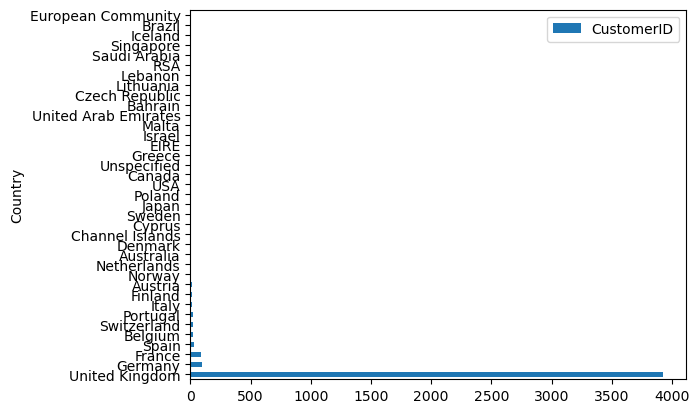

In [21]:
plt.figure(figsize=(30,100))
df6.plot.barh();

# IT IS CLEAR THAT UK HOLDS 90% OF THE CUSTOMERS

### SINCE 90% OF THE CUSTOMERS ARE FROM UK LET US RISTRICT OUR DATA TO UK

In [22]:
uk_data = c_df[c_df.Country == 'United Kingdom']

In [23]:
uk_data 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [24]:
##let us convert invoice date into datetime
uk_data['Date'] = pd.to_datetime(uk_data['InvoiceDate'])

C:\Users\SALIL KAKODKAR\AppData\Local\Temp\ipykernel_1600\1743140084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Date'] = pd.to_datetime(uk_data['InvoiceDate'])


In [25]:
uk_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,2011-12-09 12:31:00
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,2011-12-09 12:49:00
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,2011-12-09 12:49:00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,2011-12-09 12:49:00


In [26]:
### add a new column for total amount
### total amount = Quantity * UnitPrice
uk_data['Total_amount'] = uk_data['Quantity'] * uk_data['UnitPrice']

C:\Users\SALIL KAKODKAR\AppData\Local\Temp\ipykernel_1600\1279487001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Total_amount'] = uk_data['Quantity'] * uk_data['UnitPrice']


In [27]:
uk_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,2011-12-09 12:31:00,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,2011-12-09 12:49:00,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,2011-12-09 12:49:00,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,2011-12-09 12:49:00,214.80


# RFM ANALYSIS
### (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

### RECENCY (R): Days since last purchase
### FREQUENCY (F): Total number of purchases
### MONETARY VALUE (M): Total money this customer spent.
### We will create those 3 customer attributes for each customer.


# RECENCY

##### Recency = Latest Date - Last Inovice Data, 
##### Frequency = count of invoice no. of transaction(s), 
##### Monetary = Sum of Total Amount for each customer

In [28]:
import datetime as dt

In [29]:
uk_data['InvoiceDate'].max()

'9/9/2011 9:52'

In [30]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
latest_date = dt.datetime(2011,12,10)


In [31]:
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [32]:
## create rmf modelling score for each customer
RFMScores = uk_data.groupby('CustomerID').agg({'Date': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_amount': lambda x: x.sum()})

In [33]:
RFMScores.head()

,Date,InvoiceNo,Total_amount
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [34]:
### rename Date,InvoiceNo,Total_amount to Recency, Frequency and Monetary 
RFMScores.rename(columns = {'Date' : 'Recency',
                             'InvoiceNo' : 'Frequency',
                             'Total_amount' : 'Monetary'}, inplace = True)

In [35]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [36]:
#discriptive statistics (recency)
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


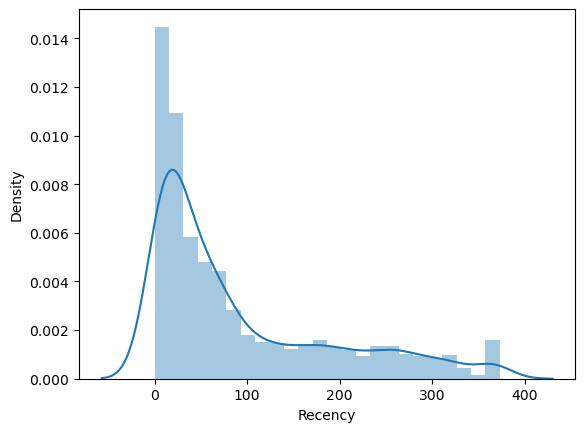

In [37]:
#Recency distribution plot
x = RFMScores['Recency']
ax = sns.distplot(x)








In [38]:
## frequency distribution plot for frequency value < then 1000
RFMScores.Frequency.describe()

count    3921.000000
mean       89.065800
std       214.022733
min         1.000000
25%        17.000000
50%        40.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


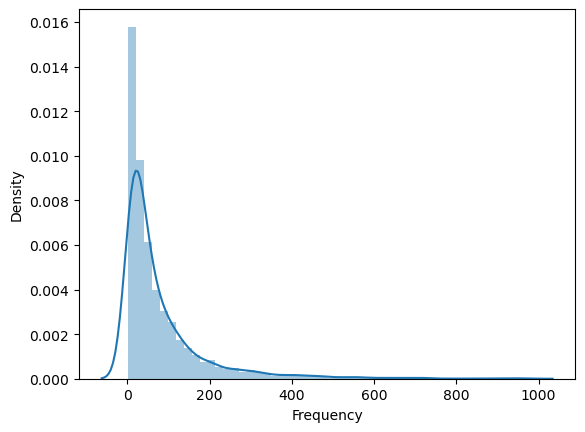

In [39]:
x = RFMScores[RFMScores.Frequency < 1000].Frequency
ax = sns.distplot(x)

In [40]:
## monetary distribution plot for Monetary value < then 1000
RFMScores.Monetary.describe()

count      3921.000000
mean       1857.950687
std        7477.736186
min           0.000000
25%         298.110000
50%         644.300000
75%        1570.810000
max      259657.300000
Name: Monetary, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


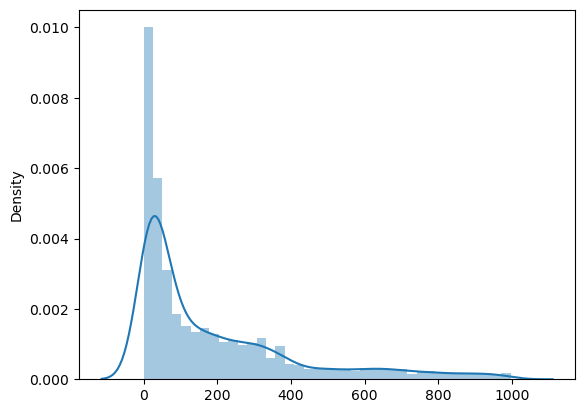

In [41]:
x = RFMScores[RFMScores.Monetary < 1000]
ax = sns.distplot(x)

In [42]:
## split into four dements using qauntiles
quantiles = RFMScores.quantile(q = [0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [43]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.11, 0.5: 644.3, 0.75: 1570.81}}

In [44]:
## function to create rfm segments
def Rscoring(x,y,z):
    if x <= y[z][0.25]:
        return 1
    elif x <= y[z][0.5]:
        return 2
    elif x <= y[z][0.75]:
        return 3
    else:
        return 4
    
def fnmscoring (x,y,z):
    if x <= y[z][0.25]:
        return 4
    elif x <= y[z][0.5]:
        return 3
    elif x <= y[z][0.75]:
        return 2
    else:
        return 1 
    

In [55]:
RFMScores['R'] = RFMScores.Recency.apply(Rscoring,args=(quantiles,'Recency')) 
RFMScores['F'] = RFMScores.Frequency.apply(fnmscoring,args=(quantiles,'Frequency'))
RFMScores['M'] = RFMScores.Monetary.apply(fnmscoring,args=(quantiles,'Monetary'))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4413,33053.19,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [56]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4413,33053.19,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444
18281.0,180,7,80.82,4,4,4,444
18282.0,7,12,178.05,1,4,4,144


In [58]:
## create rmfscore column by adding R,F,M values
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis =1)
 


In [60]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4413,33053.19,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12
18281.0,180,7,80.82,4,4,4,444,12
18282.0,7,12,178.05,1,4,4,144,9


In [61]:
###assign loyalty level to each customer 
loayalty = ['platinum','gold','silver','bronze']
score_cut = pd.qcut(RFMScores.RFMScore,q = 4,labels = loayalty )
RFMScores['RFM_loyalty_level'] = score_cut

In [62]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,silver
12747.0,2,103,4196.01,1,1,1,111,3,platinum
12748.0,0,4413,33053.19,1,1,1,111,3,platinum
12749.0,3,199,4090.88,1,1,1,111,3,platinum
12820.0,3,59,942.34,1,2,2,122,5,platinum
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,bronze
18281.0,180,7,80.82,4,4,4,444,12,bronze
18282.0,7,12,178.05,1,4,4,144,9,silver


In [66]:
### check for platinum members
RFMScores[RFMScores.RFMGroup == '111'].sort_values('Monetary',ascending = False)


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level
CustomerID,,,,,,,,,
18102.0,0,431,259657.30,1,1,1,111,3,platinum
17450.0,8,336,194390.79,1,1,1,111,3,platinum
17511.0,2,963,91062.38,1,1,1,111,3,platinum
16684.0,4,277,66653.56,1,1,1,111,3,platinum
14096.0,4,5111,65164.79,1,1,1,111,3,platinum
...,...,...,...,...,...,...,...,...,...
15172.0,8,110,1624.05,1,1,1,111,3,platinum
16987.0,3,128,1616.80,1,1,1,111,3,platinum
14178.0,8,318,1600.26,1,1,1,111,3,platinum
